In [2]:
using CSV, DataFrames, Plots, Statistics, JuMP, Gurobi, StatsBase

In [3]:
pollution = DataFrame(CSV.File("Data/pollution_location.csv"))
pollution_xy = pollution[:,1:2]|>Matrix
sensors = DataFrame(CSV.File("Data/sensors_location.csv"))
sensors_xy = sensors[:,1:2]|>Matrix;

In [4]:
lat_to_km = [111, 92]
lat_diff = (pollution_xy[:,1].-sensors_xy[:,1]').*lat_to_km[1]
long_diff = (pollution_xy[:,2].-sensors_xy[:,2]').*lat_to_km[2]

dist_matrix = sqrt.(lat_diff.^2 + long_diff.^2)';

In [5]:
r = 2
D = (dist_matrix.<=r)
q = pollution.AIQ
p = 1500
n, m = size(dist_matrix)

(2668, 7107)

In [6]:
q = pollution.AIQ
r = 1.5
p = sum(q)/n  # unit price

111.28863215948053

In [7]:
d = dist_matrix.<=r;

In [ ]:
function model1(mu)
    model = Model(Gurobi.Optimizer);
    set_optimizer_attribute(model, "TimeLimit", 5);
    
    @variable(model, x[1:n], Bin) #Whether we put a sensor at spot i
    @variable(model, y[1:m].<=1) #Whether spot j is covered
    
    @constraint(model, y'.<= x'*d)
    @constraint(model, sum(x)<=250) # Check this number
    
    
    @objective(model, Max, sum(y.*q))
    optimize!(model)
    return value.(x), value.(y)
end
x, y = model1(0.1)
sum(x)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-18
Set parameter TimeLimit to value 5
Set parameter TimeLimit to value 5
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7108 rows, 9775 columns and 25629 nonzeros
Model fingerprint: 0xc0630449
Variable types: 7107 continuous, 2668 integer (2668 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 9e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+02, 2e+02]
Found heuristic solution: objective -0.0000000
Presolve removed 1856 rows and 2685 columns
Presolve time: 0.01s
Presolved: 5252 rows, 7090 columns, 21055 nonzeros
Variable types: 0 continuous, 7090 integer (7090 binary)
Found heuristic solution: objective 66157.629771

Root relaxation: objective 1.145263e+05, 9563 iterations, 0.07 seconds 

250.0

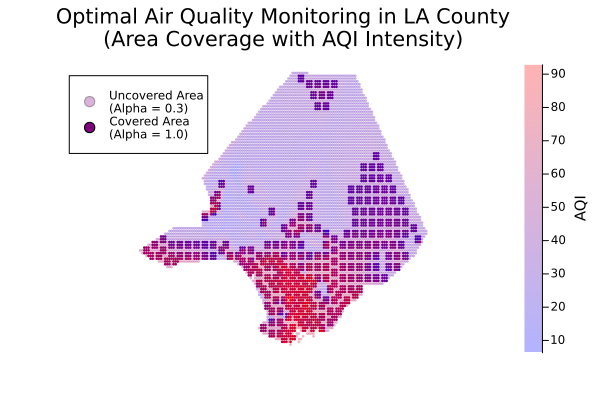

In [9]:
scatter(pollution_xy[:, 2], pollution_xy[:, 1], 
    marker_z=q, 
    color=cgrad([:blue, :red]), 
    alpha= .3 .+ 0.7 .* y ,
    markersize=1.5, 
    shape=:circle,  
    markerstrokewidth=0,
    label="",
    ratio = 1.1,
    colorbar=true, colorbar_title = "AQI", legend=:topleft, axis = false, grid = false,
    )

scatter!([NaN], [NaN], alpha = 0.3, color = :purple, shape = :circle, label = "Uncovered Area\n(Alpha = 0.3)")
scatter!([NaN], [NaN], alpha = 1.0, color = :purple, shape = :circle, label = "Covered Area\n(Alpha = 1.0)")


# Add a title with better formatting
title!("Optimal Air Quality Monitoring in LA County\n(Area Coverage with AQI Intensity)")